## Supplement 4: Classification

In [8]:
%matplotlib inline
import numpy as np


### 4.3 Programming Task: Song popularity prediction using Logistic regression
The datasets __train-songs.csv__ and __test-songs.csv__ contain audio properties of various tracks collected from the music streaming site Spotify.


The goal of the task is to train a logistic regression classifier that predicts if
a given track is popular or not.
The dataset consists of 9 columns.
The first 8 columns contain various audio properties
which are provided as input features to the model.
The last column contains the class labels given by 0(not popular) and 1(popular).

i\. Implement the loss function and its gradient for the logistic regression model.
 

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_loss(y, h_theta):
    return -np.mean(y * np.log(h_theta) + (1 - y) * np.log(1 - h_theta))

def logistic_gradient(X, y, theta):
    m = len(y)
    h_theta = sigmoid(np.dot(X, theta))
    gradient = np.dot(X.T, (h_theta - y)) / m
    return gradient

def train_logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)

    for _ in range(num_iterations):
        h_theta = sigmoid(np.dot(X, theta))
        loss = logistic_loss(y, h_theta)
        gradient = logistic_gradient(X, y, theta)

        theta -= learning_rate * gradient

    return theta

   ii\. Using the gradient descent algorithm, train the logistic regression model.
You may reuse/modify the gradient descent algorithm from the previous supplement.




In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_data = pd.read_csv("train-songs.csv")
test_data = pd.read_csv("test-songs.csv")

X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.column_stack((np.ones(len(X_train)), X_train))
X_test = np.column_stack((np.ones(len(X_test)), X_test))

m, n = X_train.shape
theta = np.zeros(n)

learning_rate = 0.01
num_iterations = 1000

# Gradient Descent
for _ in range(num_iterations):
    h_theta = 1 / (1 + np.exp(-np.dot(X_train, theta)))
    gradient = np.dot(X_train.T, (h_theta - y_train)) / m
    theta -= learning_rate * gradient

# Make predictions on the test set
predicted_probabilities = 1 / (1 + np.exp(-np.dot(X_test, theta)))
predicted_labels = (predicted_probabilities >= 0.5).astype(int)

# Evaluation
accuracy = np.mean(predicted_labels == y_test)
print(f"Accuracy on the test set: {accuracy}")



Accuracy on the test set: 0.7925


iii\. Using model predictions on __test-songs.csv__, build the confusion
matrix and subsequently calculate the precision, recall, and F1-score for a threshold of 0.4.


In [11]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

threshold = 0.4
predicted_labels_threshold = (predicted_probabilities >= threshold).astype(int)

# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels_threshold)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predicted_labels_threshold)
recall = recall_score(y_test, predicted_labels_threshold)
f1 = f1_score(y_test, predicted_labels_threshold)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Confusion Matrix:
[[643 357]
 [ 80 920]]
Precision: 0.7204
Recall: 0.9200
F1-score: 0.8081


iv\. Plot the ROC curve for the model and calculate the AUC metric of your model.


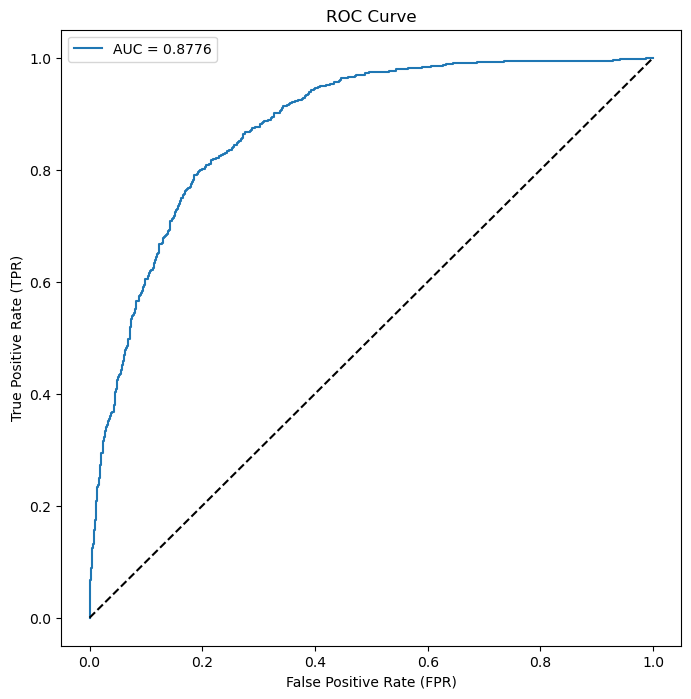

AUC: 0.8776


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)

# Calculate AUC
auc = roc_auc_score(y_test, predicted_probabilities)

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"AUC: {auc:.4f}")



v\. Consider the simpler models given below.The input $\mathbf{x}$ in these models takes only 4 input features from the given dataset.

- Model A $~~~~~~~~~~~$   $\mathbf{x}$ = $[$ danceability, key, valence, tempo $]^\top$
- Model B $~~~~~~~~~~~$  $\mathbf{x}$ = $[$ danceability, loudness, acousticness, instrumentalness $]^\top$
- Model C $~~~~~~~~~~~$ $\mathbf{x}$ = $[$ key, liveness, valence, tempo $]^\top$

Train these models using your logistic regression implementation and determine the best performing model using the AUC metric.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_data = pd.read_csv("train-songs.csv")
test_data = pd.read_csv("test-songs.csv")

# Define feature sets
features_model_A = ["danceability", "key", "valence", "tempo"]
features_model_B = ["danceability", "loudness", "acousticness", "instrumentalness"]
features_model_C = ["key", "liveness", "valence", "tempo"]

# Train and evaluate
def train_and_evaluate_model(features):
    X_train = train_data[features].values
    y_train = train_data.iloc[:, -1].values  # Use the last column for labels
    X_test = test_data[features].values
    y_test = test_data.iloc[:, -1].values  # Use the last column for labels

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Add a column of ones for the bias term
    X_train = np.column_stack((np.ones(len(X_train)), X_train))
    X_test = np.column_stack((np.ones(len(X_test)), X_test))

    # Train logistic regression model
    learned_parameters = train_logistic_regression(X_train, y_train)

    predicted_probabilities = sigmoid(np.dot(X_test, learned_parameters))

    # Calculate AUC
    auc = roc_auc_score(y_test, predicted_probabilities)

    return auc

# Train and evaluate
auc_model_A = train_and_evaluate_model(features_model_A)
auc_model_B = train_and_evaluate_model(features_model_B)
auc_model_C = train_and_evaluate_model(features_model_C)
print(f"AUC for Model A: {auc_model_A:.4f}")
print(f"AUC for Model B: {auc_model_B:.4f}")
print(f"AUC for Model C: {auc_model_C:.4f}")

# Determine the best performing model
best_model = np.argmax([auc_model_A, auc_model_B, auc_model_C]) + 1  # Add 1 to get the model number
print(f"The best performing model is Model {chr(64 + best_model)}")


AUC for Model A: 0.6542
AUC for Model B: 0.8750
AUC for Model C: 0.5615
The best performing model is Model B
